In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [15]:
# load csv file
df = pd.read_csv('cycle_test(output).csv')
df['millis'] = df.index * 100
df['sec'] = df['millis'] / 1000
df.head()

,Timestamp,Data,millis,sec
0,12/12/2024 21:55,784.28,0,0.0
1,12/12/2024 21:55,784.30,100,0.1
2,12/12/2024 21:55,784.30,200,0.2
3,12/12/2024 21:55,784.25,300,0.3
4,12/12/2024 21:55,784.29,400,0.4


In [4]:
# find local maxima in data
window = 100
df['max'] = df['Data'].rolling(window=window).apply(lambda x: x[window//2] if x[window//2] > max(x[:window//2]) and x[window//2] > max(x[window//2+1:]) else np.nan, raw=True)

# find local minima in data
df['min'] = df['Data'].rolling(window=window).apply(lambda x: x[window//2] if x[window//2] < min(x[:window//2]) and x[window//2] < min(x[window//2+1:]) else np.nan, raw=True)

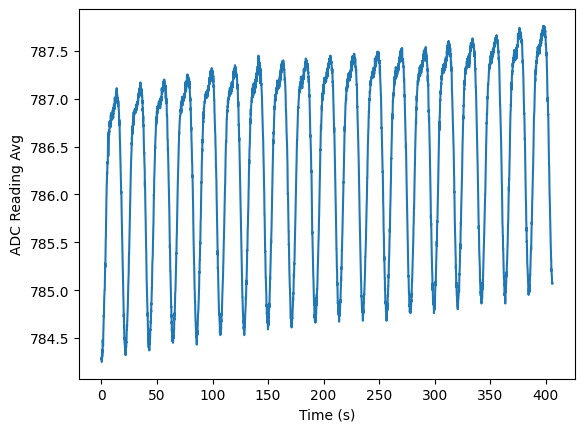

In [16]:
# plot data
plt.xlabel('Time (s)')
plt.ylabel('ADC Reading Avg')
plt.plot(df['sec'],df['Data'])
# plt.plot(df['max'], 'go')
# plt.plot(df['min'], 'ro')
plt.show()


In [6]:
# median number of readings between maxima
print(df['max'].dropna().index.to_series().diff().median())

# median number of readings between minima
print(df['min'].dropna().index.to_series().diff().median())

# median number of readings between maxima and minima
print(df['max'].dropna().index.to_series().diff().median() + df['min'].dropna().index.to_series().diff().median())



215.0
214.0
429.0


In [25]:
# add column counting up to 215/2 and back down repeating
seq = np.arange(215//2)
seq2 = np.arange(215//2, 0, -1)
seq = np.concatenate((seq, seq2))

seq3 = np.concatenate((np.zeros(215//2), np.ones(215//2)))
# print(seq)
df['count'] = df.index % 214
df['pos'] = df['count'].apply(lambda x: seq[x])
df['falling'] = df['count'].apply(lambda x: seq3[x])

# # df['count'] = df.index % 215
df



,Timestamp,Data,millis,sec,count,pos,cycle,falling
0,12/12/2024 21:55,784.28,0,0.0,0,0,1.0,0.0
1,12/12/2024 21:55,784.30,100,0.1,1,1,1.0,0.0
2,12/12/2024 21:55,784.30,200,0.2,2,2,1.0,0.0
3,12/12/2024 21:55,784.25,300,0.3,3,3,1.0,0.0
4,12/12/2024 21:55,784.29,400,0.4,4,4,1.0,0.0
...,...,...,...,...,...,...,...,...
4056,12/12/2024 22:01,785.13,405600,405.6,204,10,19.0,1.0
4057,12/12/2024 22:01,785.09,405700,405.7,205,9,19.0,1.0
4058,12/12/2024 22:01,785.07,405800,405.8,206,8,19.0,1.0
4059,12/12/2024 22:01,785.08,405900,405.9,207,7,19.0,1.0


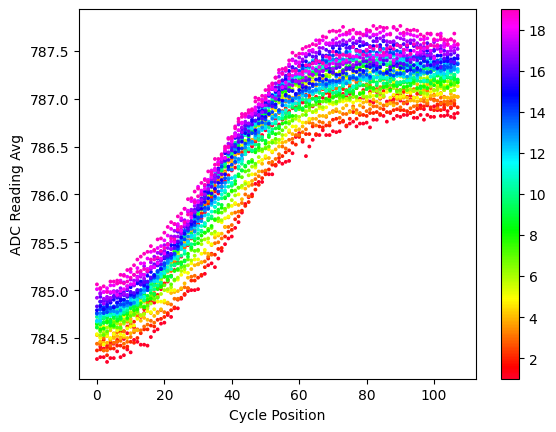

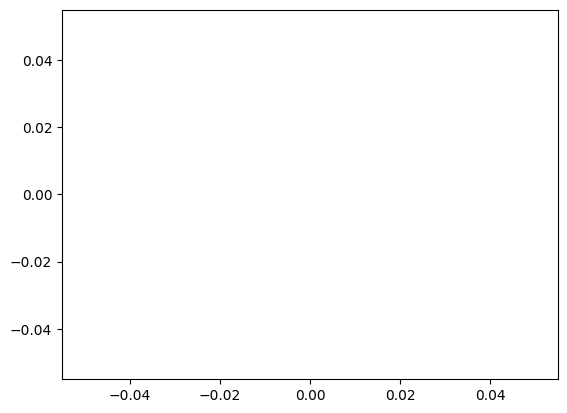

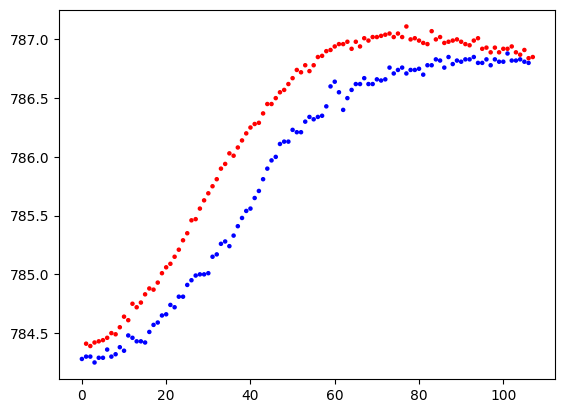

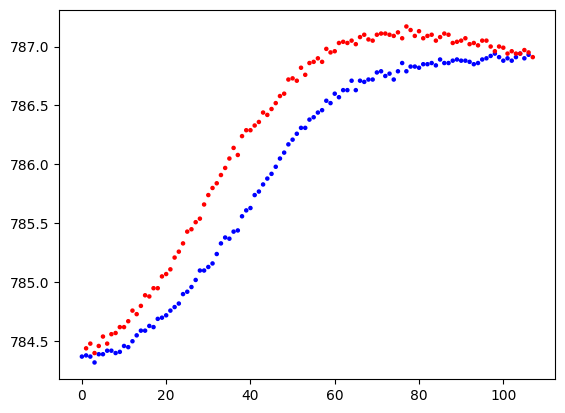

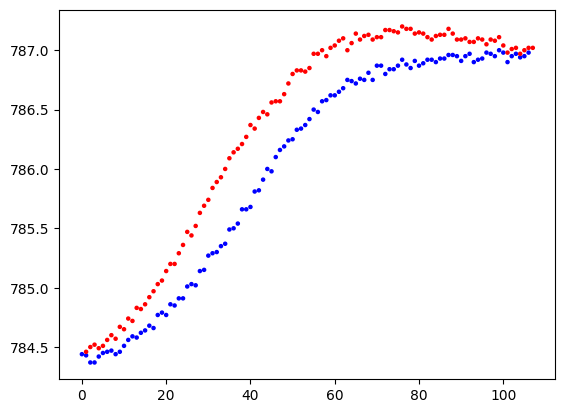

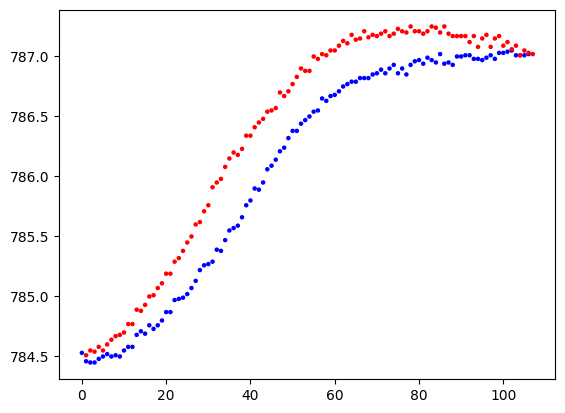

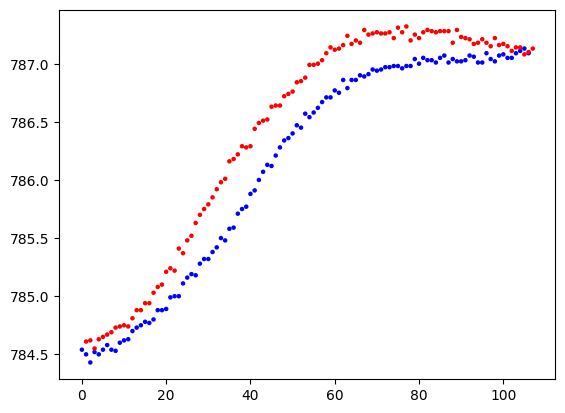

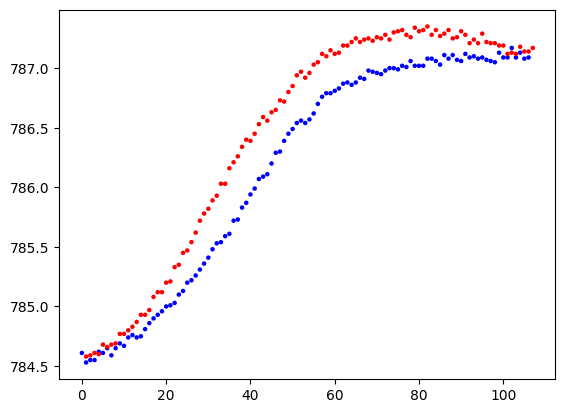

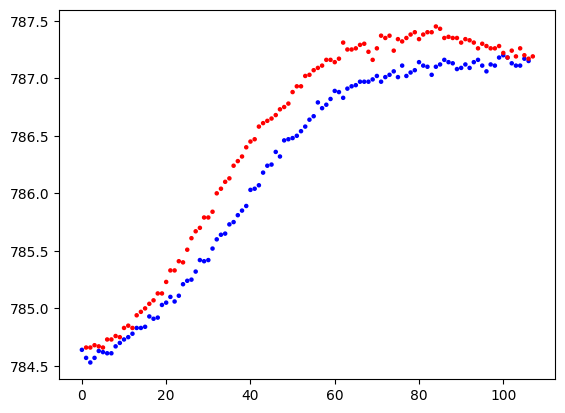

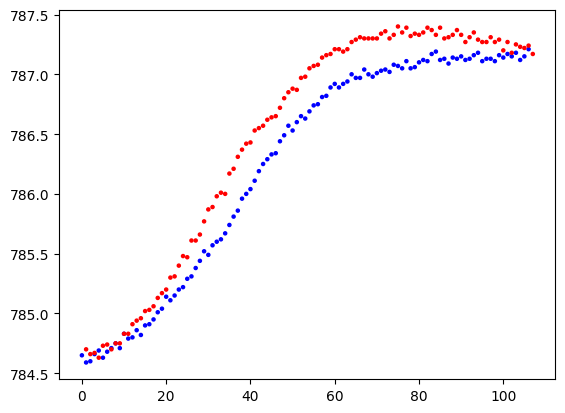

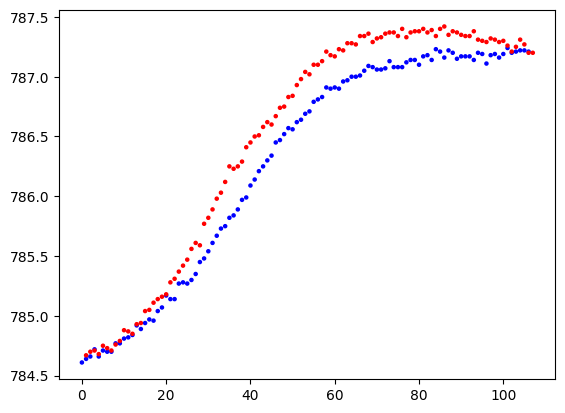

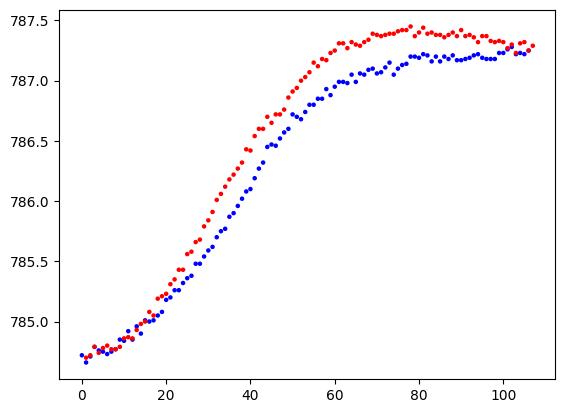

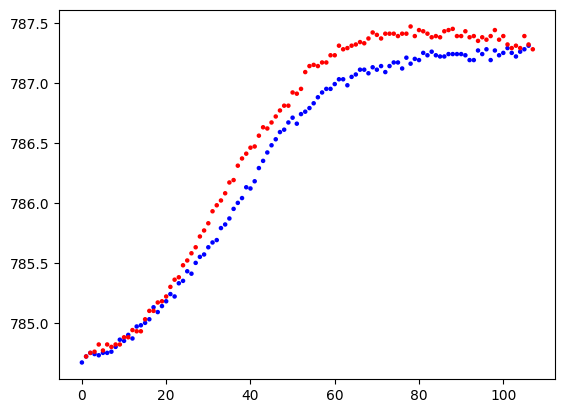

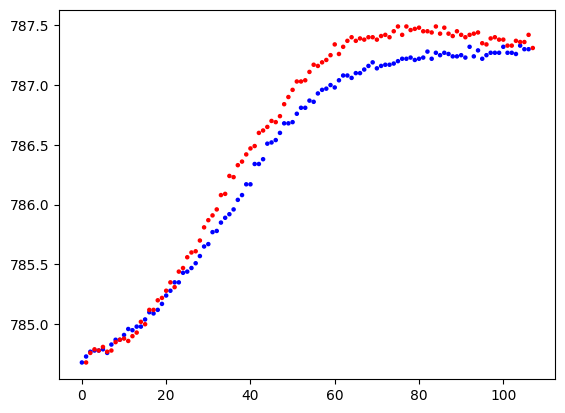

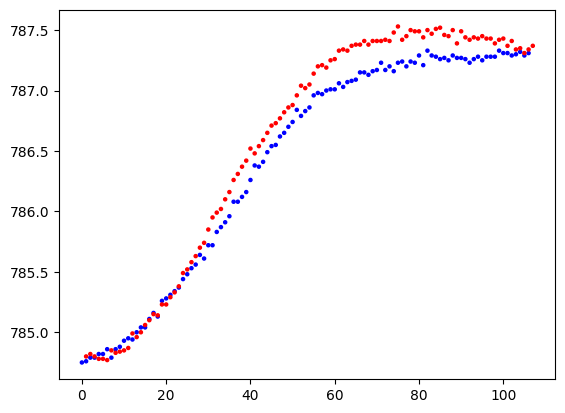

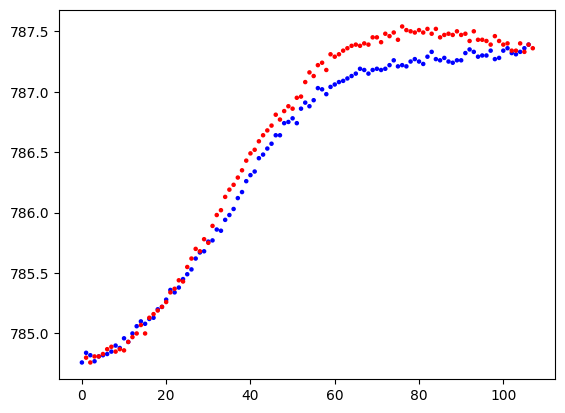

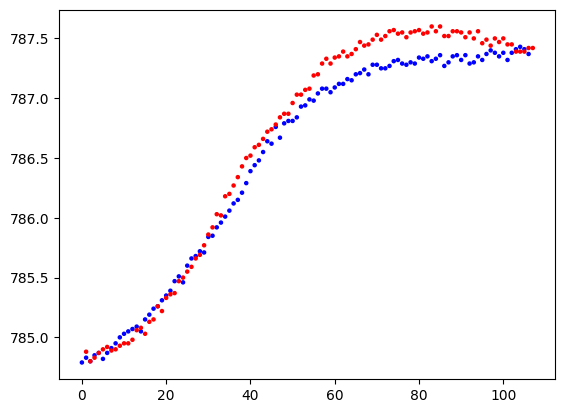

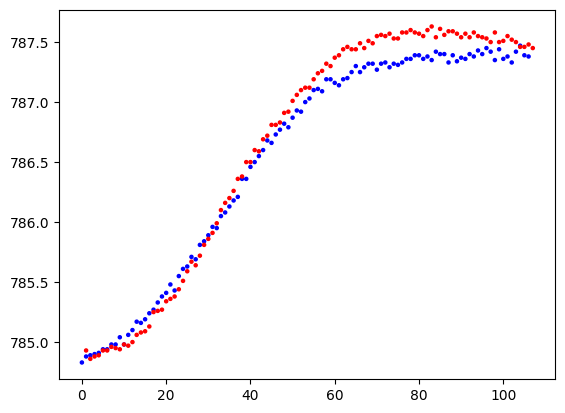

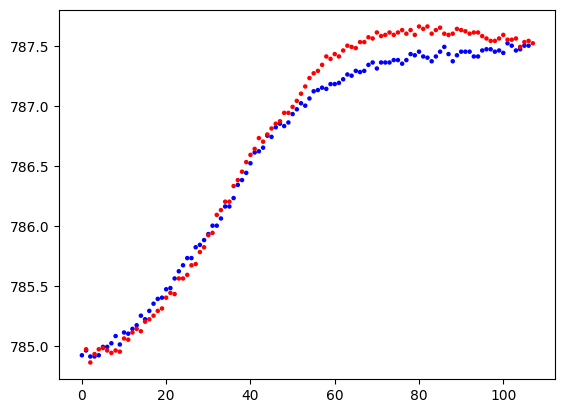

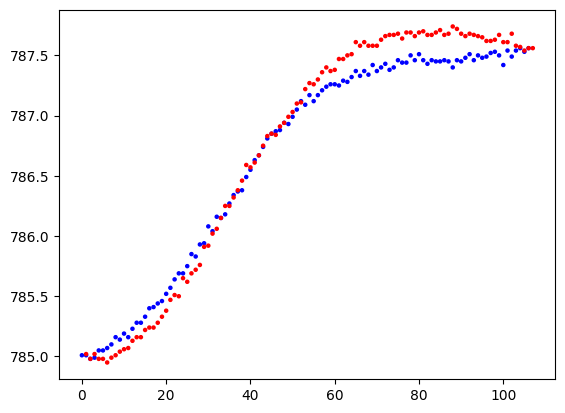

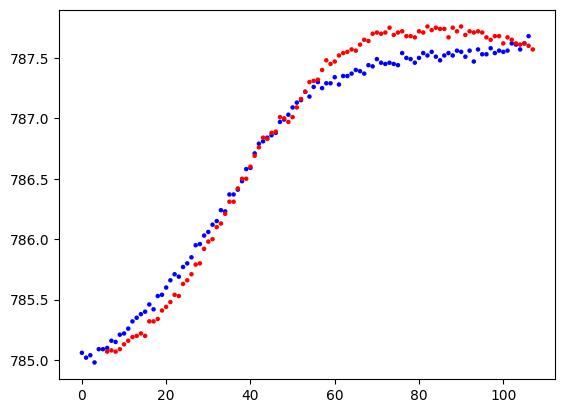

,Timestamp,Data,millis,sec,count,pos,cycle,falling
0,12/12/2024 21:55,784.28,0,0.0,0,0,1.0,0.0
1,12/12/2024 21:55,784.30,100,0.1,1,1,1.0,0.0
2,12/12/2024 21:55,784.30,200,0.2,2,2,1.0,0.0
3,12/12/2024 21:55,784.25,300,0.3,3,3,1.0,0.0
4,12/12/2024 21:55,784.29,400,0.4,4,4,1.0,0.0
...,...,...,...,...,...,...,...,...
4056,12/12/2024 22:01,785.13,405600,405.6,204,10,19.0,1.0
4057,12/12/2024 22:01,785.09,405700,405.7,205,9,19.0,1.0
4058,12/12/2024 22:01,785.07,405800,405.8,206,8,19.0,1.0
4059,12/12/2024 22:01,785.08,405900,405.9,207,7,19.0,1.0


In [ ]:
# scatter plot data vs count, color is index
# plt.scatter(df['pos'][df['count'] == 1], df['Data'][df['count'] == 1], c=df.index[df['count'] == 1], s=3, cmap='gist_rainbow')
# plt.scatter(df['pos'], df['Data'], c=df['falling'], s=3, cmap='bwr')
plt.scatter(df['pos'], df['Data'], c=df['cycle'], s=3, cmap='gist_rainbow')
plt.title('ADC vs Cycle Position, Colored by Cycle Number')
plt.xlabel('Cycle Position')
plt.ylabel('ADC Reading Avg')
plt.colorbar()
plt.show()

cycle = 0
for index, row in df.iterrows():
    if row['pos'] == 0:
        cycle += 1
    df.at[index, 'cycle'] = cycle
df

for i in range(20):
    df2 = df[df['cycle'] == i]
    
    plt.scatter(df2['pos'], df2['Data'], s=5, c=df2['falling'], cmap='bwr')
    plt.show()
df

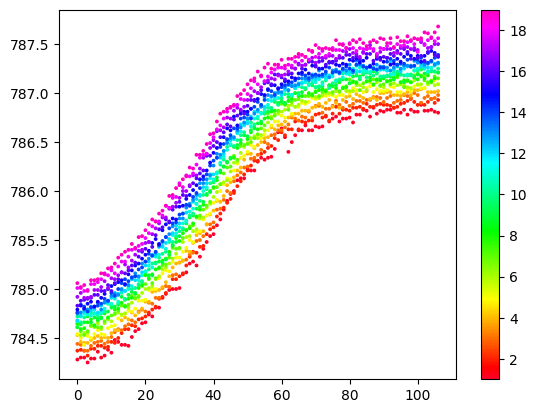

In [32]:
is_falling = 0
plt.scatter(df['pos'][df['falling'] == is_falling], df['Data'][df['falling'] == is_falling], c=df['cycle'][df['falling'] == is_falling], s=3, cmap='gist_rainbow')
plt.colorbar()
plt.show()


Text(0.5, 1.0, 'Colored by Rising/Falling')

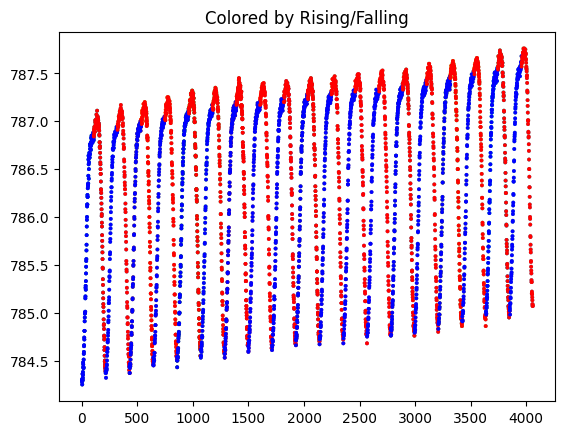

In [37]:
plt.scatter(df.index,df['Data'], c=df['pos'], s=3, cmap='viridis')
plt.title('Colored by Cycle Position')
plt.scatter(df.index,df['Data'], c=df['cycle'], s=3, cmap='tab20')
plt.title('Colored by Cycle Number')
plt.scatter(df.index,df['Data'], c=df['falling'], s=3, cmap='bwr')
plt.title('Colored by Rising/Falling')

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

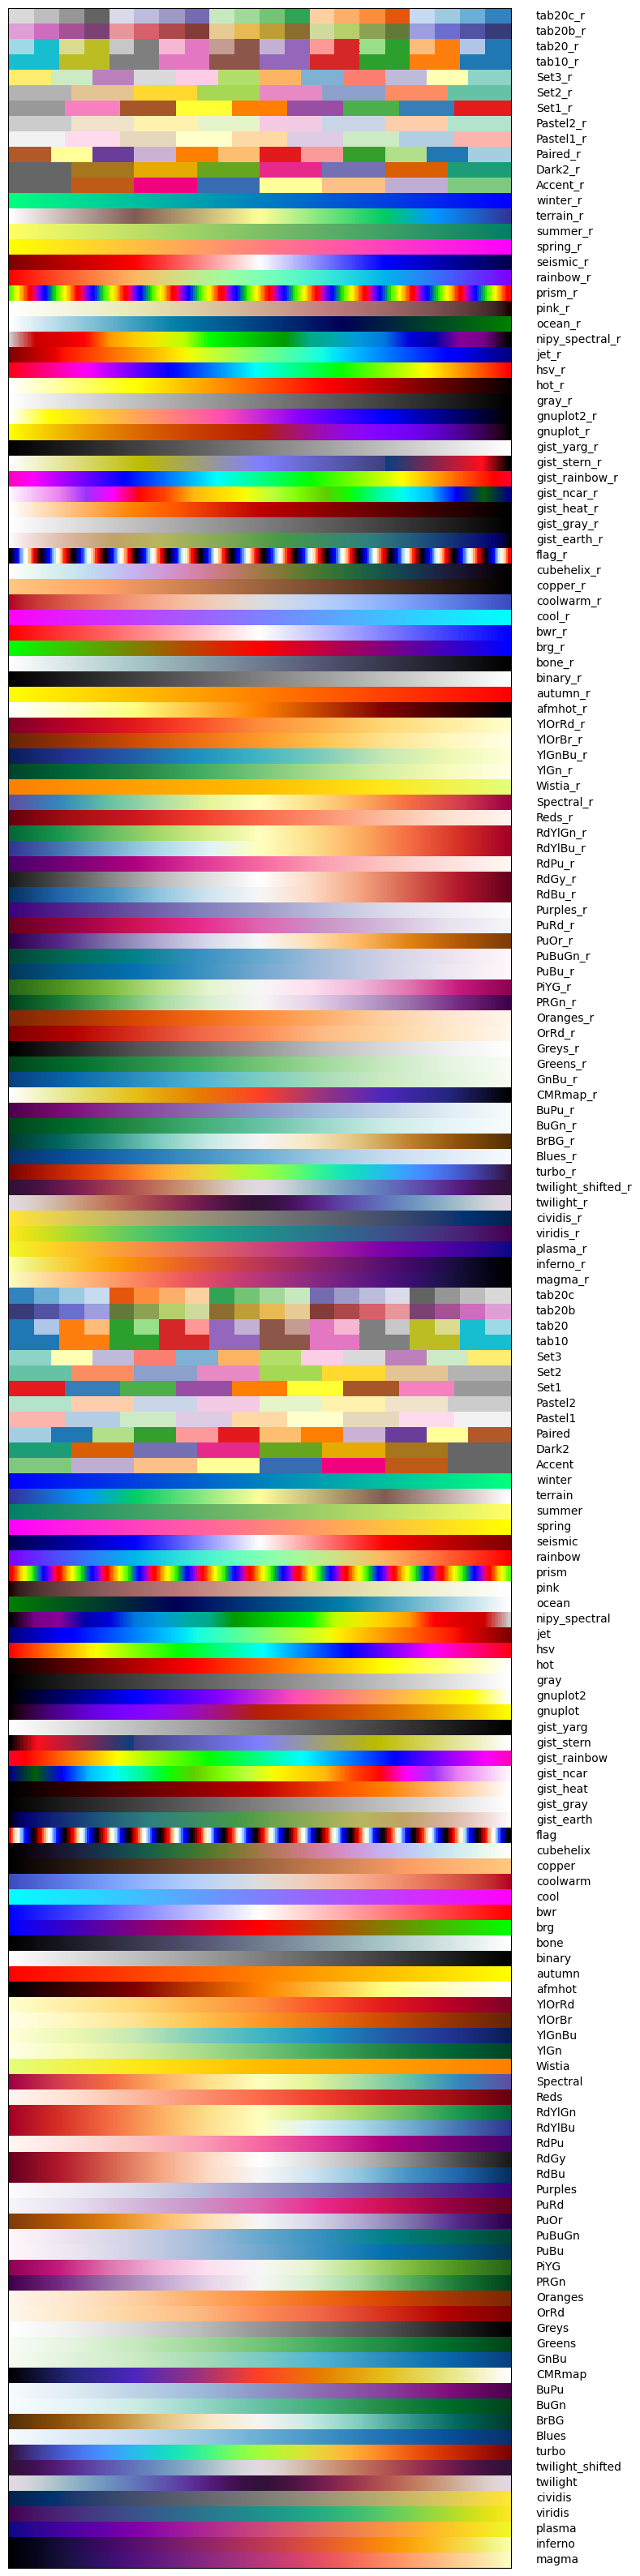

In [13]:
# Print valid colormap names
print(plt.colormaps())

# Display colormaps as gradients
n = len(plt.colormaps())
fig, ax = plt.subplots(figsize=(8, n//4))
for i, cmap in enumerate(plt.colormaps()):
    gradient = np.linspace(0, 1, 256).reshape(1, -1)
    gradient = np.vstack((gradient, gradient))
    ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(cmap), extent=[0, 1, i, i+1])
    ax.text(1.05, i + 0.5, cmap, va='center')
ax.set_xlim(0, 1)
ax.set_ylim(0, n)
ax.set_yticks([])
ax.set_xticks([])
plt.show()